## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [54]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline
import numpy as np

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

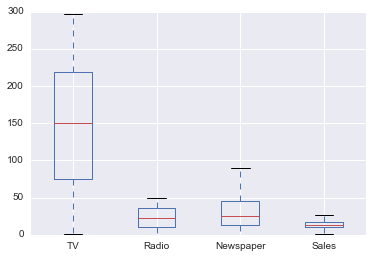

In [55]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

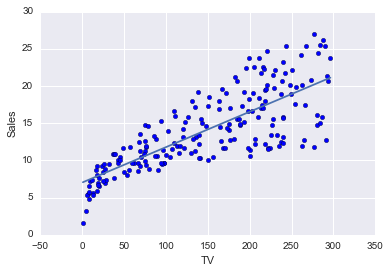

In [56]:
plt.scatter(df.TV,df.Sales)
plt.ylabel('Sales')
plt.xlabel('TV')
# add linear trendline
plt.plot(np.unique(df.TV), np.poly1d(np.polyfit(df.TV, df.Sales, 1))(np.unique(df.TV)))

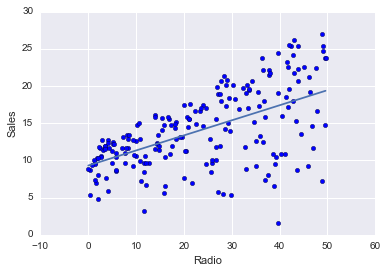

In [57]:
plt.scatter(df.Radio,df.Sales)
plt.ylabel('Sales')
plt.xlabel('Radio')
plt.plot(np.unique(df.Radio), np.poly1d(np.polyfit(df.Radio, df.Sales, 1))(np.unique(df.Radio)))

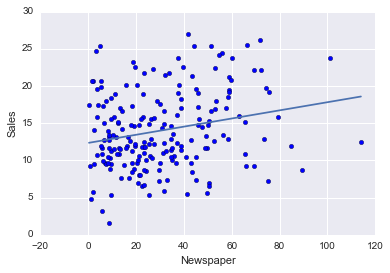

In [58]:
plt.scatter(df.Newspaper,df.Sales)
plt.ylabel('Sales')
plt.xlabel('Newspaper')
plt.plot(np.unique(df.Newspaper), np.poly1d(np.polyfit(df.Newspaper, df.Sales, 1))(np.unique(df.Newspaper)))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F2F15C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000116774A8>]], dtype=object)

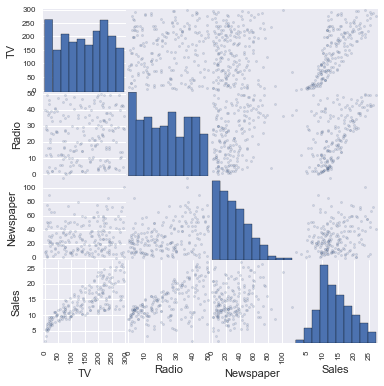

In [59]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df, alpha=0.2, figsize=(6, 6,))

Which of the variables seem correlated with one another? Which don't? Explain your answer

*TV and Radio seem positively correlated to Sales (Sales increase as TV or Radio increase).  Newspaper shows a smaller correlation with Sales.*

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [60]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [61]:
y = df.Sales

b) Set X to be just the features described above in df

In [62]:
X = df.drop('Sales',1)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [63]:
# Split the data into training/testing sets
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, train_size=0.8, random_state=0)

In [64]:
n_samples, n_features = X.shape

# Split the data into training/testing sets
X_train = X[:int(n_samples*.80)]
X_test = X[int(n_samples*.80):]

# Split the targets into training/testing sets
y_train = y[:int(n_samples*.80)]
y_test = y[int(n_samples*.80):]

In [65]:
X_train.shape, y_train.shape

((160, 3), (160L,))

In [66]:
X_test.shape, y_test.shape

((40, 3), (40L,))

d) Train model on training data, and make predictions on testing data

In [67]:
import numpy as np
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.0472521 ,  0.179922  , -0.00094408]))
Residual sum of squares: 2.79
Variance score: 0.90


e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [68]:
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train, y_train))

Residual sum of squares: 2.82
Variance score: 0.90


*Training R^2 is .90, Testing R^2 is .90 (both can vary due to samping).  This seems pretty good - the model explains ~90% of the variance.*

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

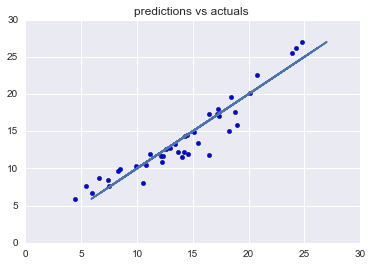

In [69]:
# Plot outputs
plt.title('predictions vs actuals ')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)

*This looks like a good model, the majority of points fall close to the predictions line and there doesn't appear to be any systematic variance.*

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [70]:
regr.coef_

array([ 0.0472521 ,  0.179922  , -0.00094408])

In [71]:
df.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


*In this model Radio has the largest coefficient but the value scales are different - the values for TV are larger, in general, than for Radio and Newspaper.  The coefficient for Newspaper is negative (though very close to zero) so likely this feature is insignificant or correlated with TV or Radio and adds little to nothing to the model.*

In [72]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


*There is some correlation between Newspaper and Radio.  Would want to check p-value for Newspaper to see if this feature is significant in the model.

h) What can you conclude from g) - can you think of a way to interpret the result?

*For a 1 unit (\$1) increase in TV advertising, Sales are predicted to increase by .044 units (all else equal).  For a 1 unit ($1) increase in Radio advertising, Sales are predicted to increase by .196 units (all else equal).  An increase (or decrease) in Newspaper advertising has virtually no impact on Sales.  This assumes TV and Radio advertising are independent - should check for interaction by adding an interaction variable to the model.*

### Bonus: How could you have improved performance?

*Drop Newspaper and add TV* \* *Radio interaction term.*

In [81]:
X_train['TVR'] = X_train['TV']*X_train['Radio']
X_test['TVR'] = X_test['TV']*X_test['Radio']
X_train.head(5)

C:\Users\allis\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\allis\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,TV,Radio,Newspaper,TVR
1,230.1,37.8,69.2,8697.78
2,44.5,39.3,45.1,1748.85
3,17.2,45.9,69.3,789.48
4,151.5,41.3,58.5,6256.95
5,180.8,10.8,58.4,1952.64


In [82]:
import numpy as np
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train.drop('Newspaper',1), y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test.drop('Newspaper',1)) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test.drop('Newspaper',1), y_test)) 

# Train data
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_train.drop('Newspaper',1)) - y_train) ** 2))# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train.drop('Newspaper',1), y_train))

('Coefficients: \n', array([ 0.01918396,  0.02648516,  0.00109794]))
Residual sum of squares: 0.39
Variance score: 0.99
Residual sum of squares: 1.00
Variance score: 0.96


*Train R^2 improves from .90 to .96 and test R^2 improves from .90 to .99.  More of the variance is explained by adding the TV* \* *Radio interaction term and removing Newspaper does not reduce performance.*

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [34]:
#testdf = pd.read_csv('https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/data/data.csv', delimiter=",")
testdf = pd.read_csv('./data/data.csv', delimiter=",")
testdf.head(5)

,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


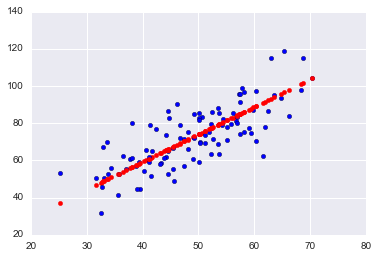

In [41]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("./data/data.csv", delimiter=",")
    #points = genfromtxt("https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/data/data.csv", delimiter=",") 
    #learning_rate = 0.0001
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


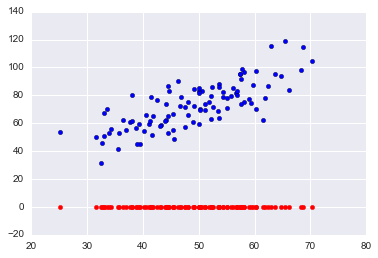

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0145470101107, m = 0.737070297359, error = 1484.58655741


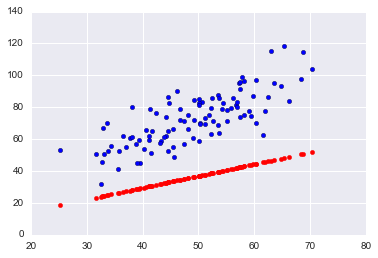

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0218739629596, m = 1.10679545435, error = 457.854257574


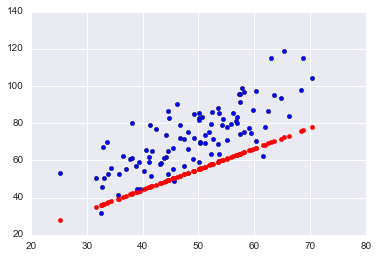

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0255792243213, m = 1.29225466491, error = 199.509985726


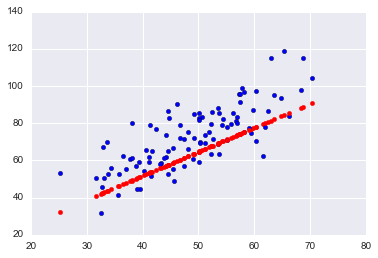

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0274677895591, m = 1.38528325565, error = 134.505910582


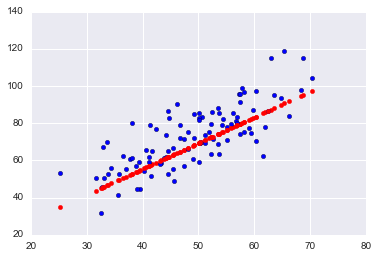

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


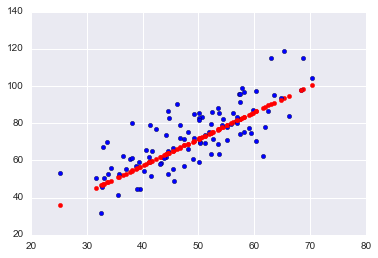

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


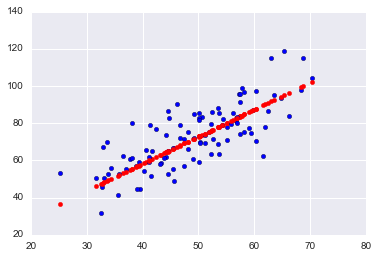

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


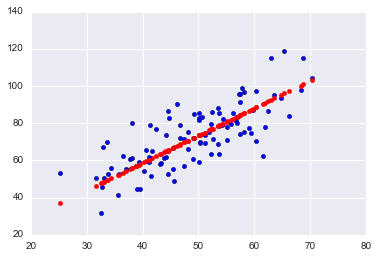

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


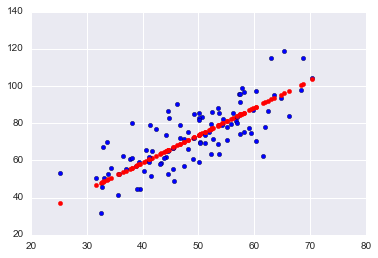

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


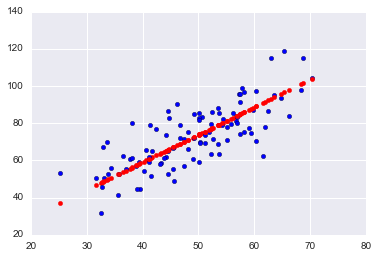

In [86]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()
